# Przetwarzanie sygnałów i obrazów: Sprawozdanie 001


## Wykorzystane biblioteki
Import wykorzystanych bibliotek
- matplotlib : do tworzenia wykresów
- numpy : do obliczeń
- scipy : do generowania funkcji


In [1]:
from matplotlib import pyplot, ticker
from numpy import ndarray, arange, array, pi, sin, cos
from scipy import signal

## Zadanie 1.1
Sporządź wykres funkcji y = x^2 + 5, w dziedzinie od -10 do 10.

In [2]:
PRECISION: float = 0.1
FIELD_START: float = -10.00
FIELD_STOP: float = 10.00

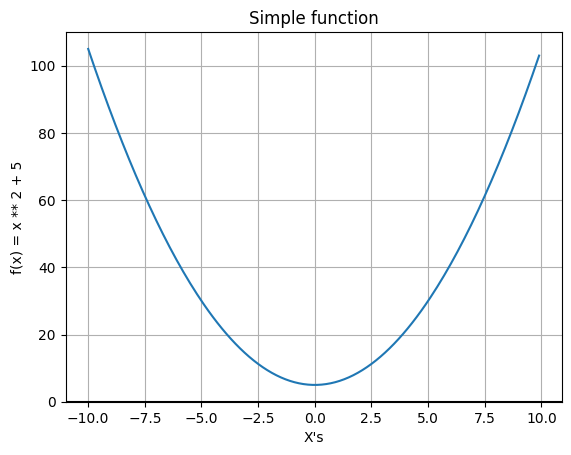

In [3]:
x_values: ndarray = arange(FIELD_START, FIELD_STOP, PRECISION)
y_values: ndarray = array([x ** 2 + 5 for x in x_values])

_, ax = pyplot.subplots()

ax.plot(x_values, y_values)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')

ax.set_title('Simple function')
ax.set_xlabel('X\'s')
ax.set_ylabel('f(x) = x ** 2 + 5')

pyplot.show()


## Zadanie 1.2
Na jednym rysunku sporządź wykres funkcji sin(x) oraz cos(x), w dziedzinie od 0 do 2PI


In [4]:
PRECISION: float = 0.01
FIELD_START: float = 0.00
FIELD_STOP: float = 2 * pi

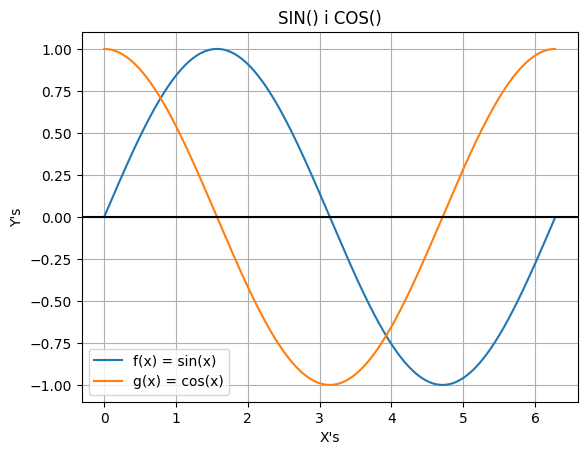

In [5]:
x_values: ndarray = arange(FIELD_START, FIELD_STOP, PRECISION)
sin_values: ndarray = sin(x_values)
cos_values: ndarray = cos(x_values)

_, ax = pyplot.subplots()

ax.plot(x_values, sin_values, label='f(x) = sin(x)')
ax.plot(x_values, cos_values, label='g(x) = cos(x)')
ax.grid(True, which='both')
ax.axhline(y=0, color='k')
ax.legend()

ax.set_title('SIN() i COS()')
ax.set_xlabel('X\'s')
ax.set_ylabel('Y\'s')

pyplot.show()


## Zadanie 1.3
Sporządź wykres sygnału sinusoidalnego o częstotliwości 1kHz i amplitudzie 2V w zakresie od 0 do 5ms.


In [6]:
PRECISION: float = 0.0001
FIELD_START: float = 0.00
FIELD_STOP: float = 0.05

FREQUENCY: int = 1000
AMPLITUDE: int = 2

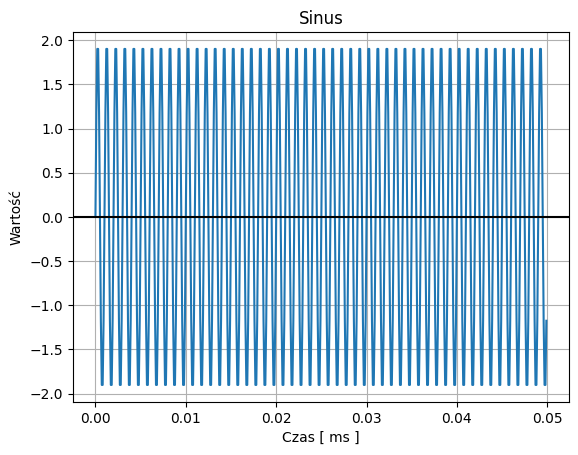

In [7]:
time: ndarray = arange(FIELD_START, FIELD_STOP, PRECISION)
sin_values: ndarray = array([sin(2 * pi * x * FREQUENCY) * AMPLITUDE for x in time])

_, ax = pyplot.subplots()

ax.plot(time, sin_values)
ax.grid(True, which='both')
ax.axhline(y=0, color='k')

ax.set_title('Sinus')
ax.set_xlabel('Czas [ ms ]')
ax.set_ylabel('Wartość')

pyplot.show()


## Zadanie 1.4
Powtórz Zadanie 1.3 dla sygnałów
- a) kosinusoidalnego
- b) prostokątnego
- c) trójkątnego
- d) piłokształtnego


In [8]:
PRECISION: float = 0.0001
FIELD_START: float = 0.00
FIELD_STOP: float = 0.05

FREQUENCY: int = 1000
AMPLITUDE: int = 2

In [9]:
def create_ys(type: str, time: ndarray):
    return {
        'sin': lambda: array([sin(2 * pi * x * FREQUENCY) * AMPLITUDE for x in time]),
        'cos': lambda: array([cos(2 * pi * x * FREQUENCY) * AMPLITUDE for x in time]),
        'square': lambda: array([signal.square(2 * pi * x * FREQUENCY) * AMPLITUDE for x in time]),
        'triangle': lambda: array([signal.sawtooth(2 * pi * x * FREQUENCY, 0.5) * AMPLITUDE for x in time]),
        'sawtooth': lambda: array([signal.sawtooth(2 * pi * x * FREQUENCY)] * AMPLITUDE for x in time)
    }[type]()


def show_plot(title: str, xs: ndarray, ys: ndarray):
    _, ax = pyplot.subplots()

    ax.plot(xs, ys)
    ax.grid(True, which='both')
    ax.axhline(y=0, color='k')

    ax.set_title(title)
    ax.set_xlabel('Czas [ ms ]')
    ax.set_ylabel('Wartość')

    pyplot.show()

In [10]:
time: ndarray = arange(FIELD_START, FIELD_STOP, PRECISION)

### A) Cosinusoidalnego

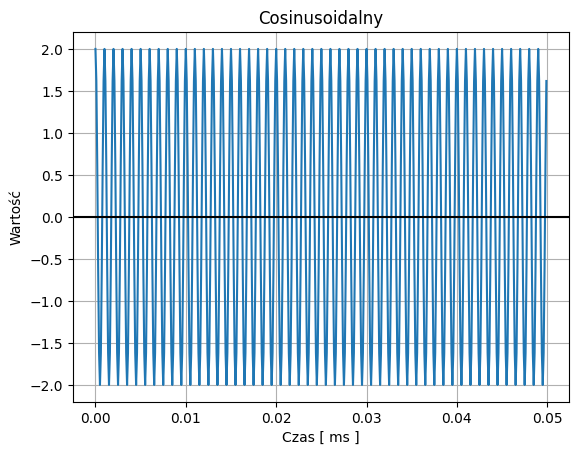

In [11]:
show_plot('Cosinusoidalny', time, create_ys('cos', time))


### B) Prostokątnego

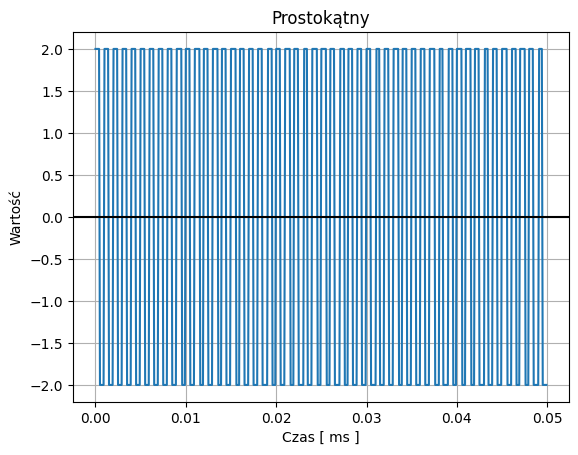

In [12]:
show_plot('Prostokątny', time, create_ys('square', time))


### C) Trójkątny

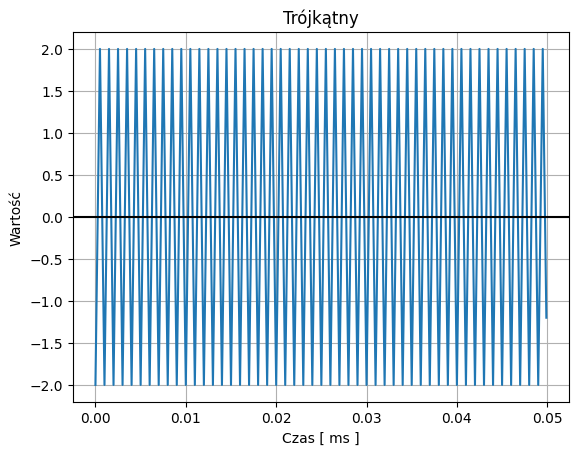

In [13]:
show_plot('Trójkątny', time, create_ys('triangle', time))


### D) Piłokształtny


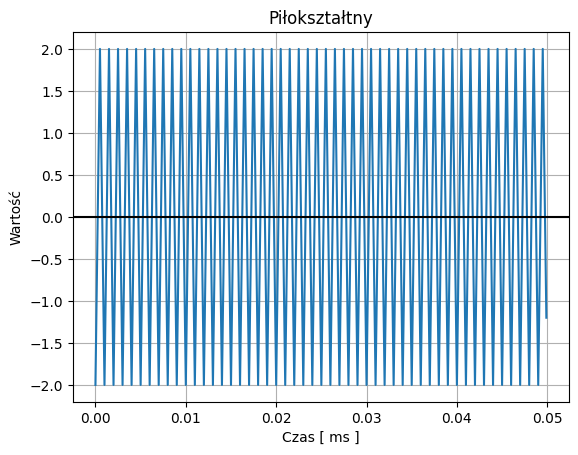

In [14]:
show_plot('Piłokształtny', time, create_ys('triangle', time))
